# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
# %pip install -r requirements.txt

In [11]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of agent failed: Traceback (most recent call last):
  File "/home/baptiste/micromamba/envs/hack/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
  File "/home/baptiste/micromamba/envs/hack/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 483, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/baptiste/micromamba/envs/hack/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 999, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/home/baptiste/Documents/cours/AIRBUS_hackathon/hackathon_toolkit/agent.py", line 38, in <module>
    class QLearn:
  File "/home/baptiste/Documents/cours/AIRBUS_hackathon/hackathon_toolkit/agent.py", line 47, in QLea

## 1. Training

In [22]:
trained_agent, all_rewards = simulate.train('config.json')





Pygame window closed

Simulation interrupted by the user


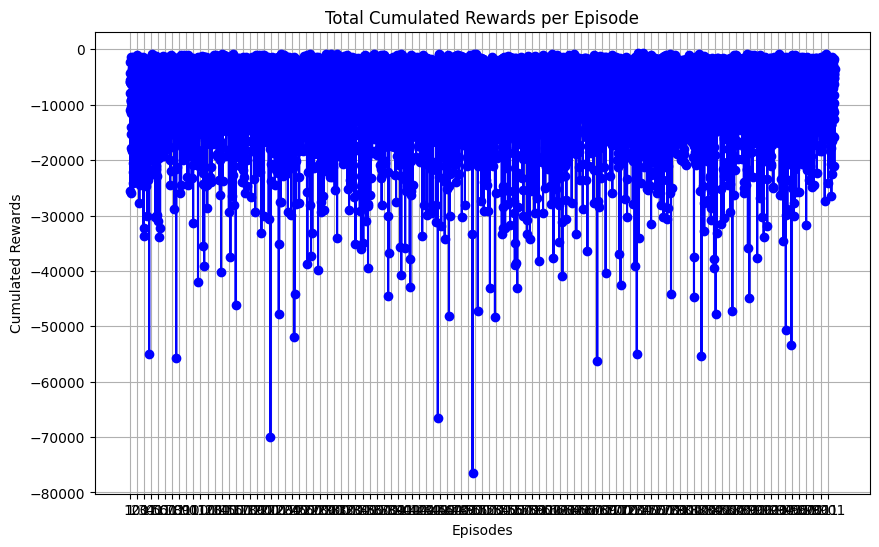

In [21]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [ ]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [ ]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)